In [19]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [20]:
# Training data: Age vs Buy (1 = Yes, 0 = No)
X = np.array([[18], [20], [22], [30], [35], [40], [50]])
y = np.array([0, 0, 0, 1, 1, 1, 1])  # 0 = No, 1 = Yes

In [21]:
# Create and train the model
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [23]:
# Predict for multiple people
test_ages = np.array([[18], [28], [40]]) # This creates a 2D array of ages for three people: 18, 28, and 40 years old.
predictions = model.predict(test_ages) # model.predict(...): gives you 0 or 1 (whether the person will buy or not).
probabilities = model.predict_proba(test_ages)
# model.predict_proba(...): gives you the probability for each class:
# probabilities[i][0] = probability of not buying (class 0)
# probabilities[i][1] = probability of buying (class 1)

# test_ages = [[18], [28], [40]]
# predictions = [0, 1, 1]
# probabilities = [[0.91, 0.09], [0.38, 0.62], [0.09, 0.91]]


In [25]:
# Print predictions
for i in range(len(test_ages)):
    age = test_ages[i][0]
    print(f"Person {i+1} (Age {age}):")
    print(f"  Will buy? {'Yes' if predictions[i] == 1 else 'No'}")
    print(f"  Probability of buying: {probabilities[i][1]:.2f}")
    print(f"  Probability of not buying: {probabilities[i][0]:.2f}")
    print()

# for i in range(len(test_ages)):
#       This is a loop that runs once for each person in test_ages.
#       len(test_ages) returns the number of people (e.g., 3 if you gave ages 18, 28, and 40).
#       i will be 0, 1, 2 (indexes for each person).

# age = test_ages[i][0]
#       test_ages is a 2D array like: [[18], [28], [40]]
#       So test_ages[i] gives you one person’s age as a list, like [18]
#       test_ages[i][0] gives just the number 18

# print(f"Person {i+1} (Age {age}):")
#       i+1 makes it say Person 1, 2, 3 (more natural than starting at 0).
#       This prints the person's number and age.

# print(f" Will buy? {'Yes' if predictions[i] == 1 else 'No'}")
#       predictions contains 0 or 1 for each person:
#       1 = will buy
#       0 = will not buy
#       'Yes' if predictions[i] == 1 else 'No' is a short way to write an if-else
#       If the model predicts 1 → print "Yes", else "No"

# print(f" Probability of buying: {probabilities[i][1]:.2f}")
#       probabilities[i] is like [0.23, 0.77] → [P(No), P(Yes)]
#       probabilities[i][1] is the probability of buying (class 1)
#       :.2f formats it to 2 decimal places, like 0.77

# print(f" Probability of not buying: {probabilities[i][0]:.2f}")
#       Same logic, but probabilities[i][0] is the probability of not buying (class 0)

# print()
#       This prints a blank line between people to make the output cleaner

Person 1 (Age 18):
  Will buy? No
  Probability of buying: 0.00
  Probability of not buying: 1.00

Person 2 (Age 28):
  Will buy? Yes
  Probability of buying: 0.77
  Probability of not buying: 0.23

Person 3 (Age 40):
  Will buy? Yes
  Probability of buying: 1.00
  Probability of not buying: 0.00



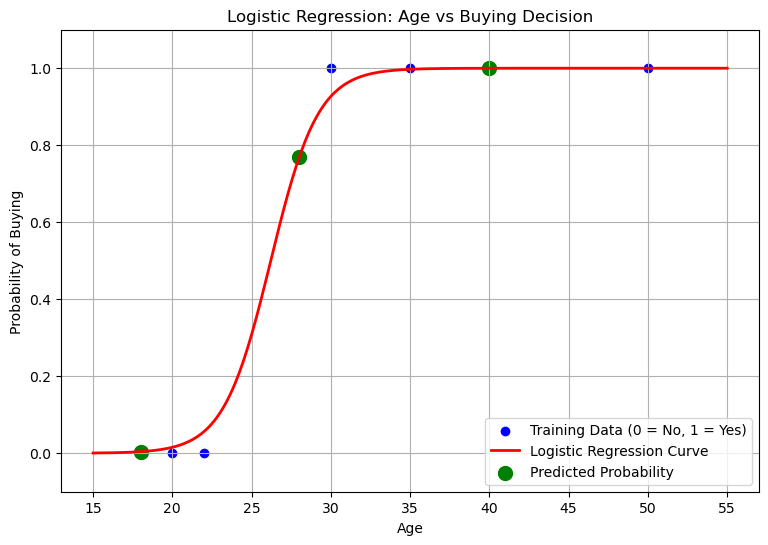

In [26]:
# Plotting
plt.figure(figsize=(9, 6))

# Plot training data
plt.scatter(X, y, color='blue', label='Training Data (0 = No, 1 = Yes)')

# Create a smooth curve (sigmoid line)
x_range = np.linspace(15, 55, 300).reshape(-1, 1)
y_probs = model.predict_proba(x_range)[:, 1]  # Probability of class 1
plt.plot(x_range, y_probs, color='red', linewidth=2, label='Logistic Regression Curve')

# Plot prediction points
for i in range(len(test_ages)):
    age = test_ages[i][0]
    prob = probabilities[i][1]
    label = "Predicted Probability" if i == 0 else None  # Label only once
    plt.scatter(age, prob, color='green', s=100, label=label)

# Add plot labels and legend
plt.title("Logistic Regression: Age vs Buying Decision")
plt.xlabel("Age")
plt.ylabel("Probability of Buying")
plt.ylim(-0.1, 1.1) # Set the y-axis limit range to (-0.1,1.1)
plt.grid(True)
plt.legend()
plt.show()